In [1]:
import sys
print (sys.version)
# init
#%matplotlib widget
#%matplotlib inline
import numpy as np
from sympy import *
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from spb import plot3d_parametric_surface, plot3d_parametric_line, PB, MB, KB
#%matplotlib notebook
from IPython.display import display, Markdown, Latex

3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


In [2]:
def EqPrint(lhs, rhs):
    return Markdown(f"${lhs} = "f"{latex(rhs)}$")

# Definition 12.10, tangentplan
def get_N(r, u, v):
    rxr = diff(r, u).cross(diff(r, v))
    return simplify(rxr / rxr.norm())

# Definition 13.1
def get_F_I(r, u, v):
    m = simplify(Matrix([[diff(r,u).dot(diff(r,u)), diff(r,u).dot(diff(r,v))]
                        ,[diff(r,v).dot(diff(r,u)), diff(r,v).dot(diff(r,v))]]))
    return m

# Definition 13.1
def get_F_II(r, u, v):
    r_N = simplify(get_N(r, u, v))
    m = simplify(Matrix([[diff(r,u,u).dot(r_N), diff(r,u,v).dot(r_N)]
                        ,[diff(r,v,u).dot(r_N), diff(r,v,v).dot(r_N)]]))
    return m

def get_Weingarten(r, u, v):
    F_I = simplify(get_F_I(r, u, v))
    F_II = simplify(get_F_II(r, u, v))
    return simplify(F_I.inverse() * F_II)

# Definition 14.1
#def get_GaussK(kappa1, kappa2, u, v):
#    return

# Definition 14.3
def get_GaussK(Weingarten):
    return Weingarten.det()

# Definition 14.3
def get_MiddelH(Weingarten):
    return Weingarten.trace() / 2


In [3]:
u, v, t = symbols('u v t', real=True)
#u, v, t = symbols('u v t')
x, y, z = symbols('x y z')
a, b, c = symbols('a b c')

# Hjemmeopgave 6
Differentialgeometri og Parametrisk design - 01237

Kaare G. S. Hansen, s214282, DTU

22\. november 2022

## Opgave 4 fra E17
![](2022-11-08-22-50-57.png)
$$
\mathbf{r}(t, u)=(2 \cos (t)+\cos (t) \cos (u), 2 \sin (t)+\sin (t) \cos (u), \sin (u)), t \in[0,2 \pi], u \in[-\pi, \pi] \quad .
$$


In [4]:
r = Matrix([2*cos(t)+cos(t)*cos(u), 2*sin(t)+sin(t)*cos(u), sin(u)])
t_dom = (t, 0, 2*pi)
u_dom = (u, -pi, pi)
EqPrint("r(t,u)", r)

$r(t,u) = \left[\begin{matrix}\cos{\left(t \right)} \cos{\left(u \right)} + 2 \cos{\left(t \right)}\\\sin{\left(t \right)} \cos{\left(u \right)} + 2 \sin{\left(t \right)}\\\sin{\left(u \right)}\end{matrix}\right]$

1. Bestem arealet af torus-fladen


In [5]:
r_jacobi = diff(r, u).cross(diff(r, t)).norm()
areal_int = simplify(Integral(Integral(r_jacobi, t_dom), u_dom))
EqPrint("A", areal_int)

$A = \int\limits_{- \pi}^{\pi}\int\limits_{0}^{2 \pi} \left|{\cos{\left(u \right)} + 2}\right|\, dt\, du$

In [6]:
areal = areal_int.doit()
EqPrint("A", areal)

$A = 8 \pi^{2}$

2. Bestem volumenet af den tilsvarende massive torus, dvs.: bestem volumenet af det rumlige område, som er afgrænset af torus-fladen


Vi lægger parametren $v$ til parameterfremstillings 3. koordinat, og får:

In [7]:
r_sol = Matrix(r)
r_sol[2] *= v
v_dom = (v, 0, 1)
EqPrint("r_{sol}(t,u,v)",r_sol)

$r_{sol}(t,u,v) = \left[\begin{matrix}\cos{\left(t \right)} \cos{\left(u \right)} + 2 \cos{\left(t \right)}\\\sin{\left(t \right)} \cos{\left(u \right)} + 2 \sin{\left(t \right)}\\v \sin{\left(u \right)}\end{matrix}\right]$

In [8]:
r_sol_jacobi = diff(r_sol, t).cross(diff(r_sol, u)).dot(diff(r_sol, v))
r_sol_int = simplify(Integral(Integral(Integral(r_sol_jacobi, t_dom), u_dom), v_dom))
EqPrint("Vol", r_sol_int)

$Vol = \int\limits_{0}^{1}\int\limits_{- \pi}^{\pi}\int\limits_{0}^{2 \pi} \left(\cos{\left(u \right)} + 2\right) \sin^{2}{\left(u \right)}\, dt\, du\, dv$

In [9]:
vol = r_sol_int.doit()
EqPrint("Vol", vol)

$Vol = 4 \pi^{2}$

3. Bestem Weingarten-matricen $\mathbf{W}(t, u)$ for alle $(t, u)$ for torus-fladens parameterfremstilling


In [10]:
F_I = simplify(get_F_I(r, t, u))
F_II = simplify(get_F_II(r, t, u))
display(
    EqPrint("\mathcal{F}_I(t,u)", F_I),
    EqPrint("\mathcal{F}_{II}(t,u)", F_II)
)

$\mathcal{F}_I(t,u) = \left[\begin{matrix}\left(\cos{\left(u \right)} + 2\right)^{2} & 0\\0 & 1\end{matrix}\right]$

$\mathcal{F}_{II}(t,u) = \left[\begin{matrix}- \frac{\left(\cos{\left(u \right)} + 2\right)^{2} \cos{\left(u \right)}}{\left|{\cos{\left(u \right)} + 2}\right|} & 0\\0 & - \frac{\cos{\left(u \right)} + 2}{\left|{\cos{\left(u \right)} + 2}\right|}\end{matrix}\right]$

In [11]:
Weingarten = get_Weingarten(r, t, u)
EqPrint("\mathcal{W}(t,u)", Weingarten)

$\mathcal{W}(t,u) = \left[\begin{matrix}- \frac{\cos{\left(u \right)}}{\left|{\cos{\left(u \right)} + 2}\right|} & 0\\0 & - \frac{\cos{\left(u \right)} + 2}{\left|{\cos{\left(u \right)} + 2}\right|}\end{matrix}\right]$

4. Bestem og beskriv de(t) punkt(er) på den givne torus-flade, hvor Gauss-krumningen $K$ er størst.

In [12]:
GaussK = get_GaussK(Weingarten)
EqPrint("K", GaussK)

$K = \frac{\cos{\left(u \right)}}{\cos{\left(u \right)} + 2}$

Vi differentierer og finder punkter med nul-vækst:

In [13]:
GaussK_m = diff(GaussK, u)
GaussK_m

-sin(u)/(cos(u) + 2) + sin(u)*cos(u)/(cos(u) + 2)**2

In [14]:
sol = solveset(Eq(GaussK_m, 0), u)
sol

Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

In [15]:
sol_u = [2 * pi, 2 * pi + pi]
for _u in sol_u:
    pts = r.subs({u:_u})
    _K = GaussK.subs({u:_u})
    display(Markdown("Punkterne "f"${latex(pts)}$, har alle en krumning på $K={_K}$"))

Punkterne $\left[\begin{matrix}3 \cos{\left(t \right)}\\3 \sin{\left(t \right)}\\0\end{matrix}\right]$, har alle en krumning på $K=1/3$

Punkterne $\left[\begin{matrix}\cos{\left(t \right)}\\\sin{\left(t \right)}\\0\end{matrix}\right]$, har alle en krumning på $K=-1$

hvor $t \in [0, 2\pi]$

Dvs. at den største krumning, $K=1/3$, findes i alle punkter på den ydre ring der omkreder torusen. Se figuren forneden:

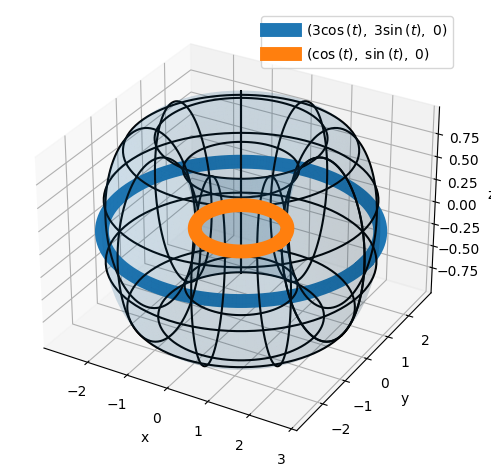

In [16]:
plt1 = plot3d_parametric_line(*r.subs({u:0}), t_dom, backend=MB, rendering_kw={"linewidth": 10.0}, use_cm=False, adaptive=False, show=False)
plt2 = plot3d_parametric_line(*r.subs({u:pi}), t_dom, backend=MB,rendering_kw={"linewidth": 10.0, "zorder":3}, use_cm=False, adaptive=False, show=False)
plt3 = plot3d_parametric_surface(*r, t_dom, u_dom, backend=MB, rendering_kw={"alpha": 0.1}, wireframe=True, use_cm=False, show=False)
plt1.extend(plt2)
plt1.extend(plt3)
plt1.show()

In [17]:
colorF = lambdify([t, u], GaussK)
t_dom2 = (t, 0, 1.5*pi)
plt4 = plot3d_parametric_surface(*r, t_dom2, u_dom, "GaussK", backend=PB,
    #rendering_kw={"alpha": 0.75},
    color_func=colorF, use_cm=True,
    adaptive=False, wireframe=True, show=False)
plt4.show()
# Dette plot er interaktivt og bliver ikke vist i PDF

## Opgave 3 fra E20
![](2022-11-08-22-54-03.png)
En parametriseret flade (keglefladen i figuren ovenfor) er givet ved
$$
\mathbf{r}(u, v)=(u \cdot \cos (v), u \cdot \sin (v), u) \quad, \quad u \in[-1,1] \quad, \quad v \in[0,2 \pi] \quad .
$$

In [18]:
r = Matrix([u*cos(v), u*sin(v), u])
u_dom, v_dom = (u, -1, 1), (v, 0, 2*pi)
EqPrint("r(u,v)",r)

$r(u,v) = \left[\begin{matrix}u \cos{\left(v \right)}\\u \sin{\left(v \right)}\\u\end{matrix}\right]$

3. Bestem anden fundamentalform matricen $\mathcal{F}_{I I}(u, v)$ for $u>0$.


In [19]:
F_II = refine(simplify(get_F_II(r, u, v)), Q.positive(u))
EqPrint("\mathcal{F}_{II}", F_II) # Assume u > 0

$\mathcal{F}_{II} = \left[\begin{matrix}0 & 0\\0 & \frac{\sqrt{2} u}{2}\end{matrix}\right]$

4. Bestem Weingarten matricen $W(u, v)$ for $u>0$.


In [20]:
Weingarten = get_Weingarten(r, u, v)
Weingarten = refine(Weingarten, Q.positive(u))
EqPrint("\mathcal{W}(u,v)", Weingarten)

$\mathcal{W}(u,v) = \left[\begin{matrix}0 & 0\\0 & \frac{\sqrt{2}}{2 u}\end{matrix}\right]$

5. Bestem middelkrumningen $H(u, v)$ for $u>0$.

In [21]:
MiddelH = get_MiddelH(Weingarten)
EqPrint("H(u,v)", MiddelH)

$H(u,v) = \frac{\sqrt{2}}{4 u}$

6. Bestem Gauss-krumningen $K(u, v)$ for $u>0$.

In [22]:
GaussK = get_GaussK(Weingarten)
EqPrint("K(u,v)", GaussK)

$K(u,v) = 0$

## Opgave 3 fra E21
![](2022-11-08-22-59-20.png)
Den blå flade i figuren ovenfor til venstre er givet ved parameterfremstillingen

$\mathscr{P}_1: \quad \mathbf{r}(u, v)=\left((u+5) \cdot \cos (v),(u+5) \cdot \sin (v), 1-u^2\right) \quad, \quad u \in[-6,3] \quad, \quad v \in[0,2 \pi]$.

En afskåret del af den blå flade er vist i nærbillede i figuren ovenfor til højre. Den del af fladen er givet ved parameterfremstillingen

$\mathscr{P}_2: \quad \mathbf{r}(u, v)=\left((u+5) \cdot \cos (v),(u+5) \cdot \sin (v), 1-u^2\right) \quad, \quad u \in[-1,1] \quad, \quad v \in[0,2 \pi]$.

In [23]:
r = Matrix([(u+5)*cos(v), (u+5)*sin(v), 1-u**2])
EqPrint("r(u,v)", r)

$r(u,v) = \left[\begin{matrix}\left(u + 5\right) \cos{\left(v \right)}\\\left(u + 5\right) \sin{\left(v \right)}\\1 - u^{2}\end{matrix}\right]$

6. Bestem anden fundamentalform matricen $\mathcal{F}_{I I}(u, v)$ for $\mathscr{P}_2$-fladen.


In [24]:
F_II = simplify(get_F_II(r, u, v))
EqPrint("F_{II}(u,v)", F_II)

$F_{II}(u,v) = \left[\begin{matrix}\frac{2 \left(- u - 5\right)}{\sqrt{4 u^{2} + 1} \left|{u + 5}\right|} & 0\\0 & - \frac{2 u \left(u + 5\right)^{2}}{\sqrt{4 u^{2} + 1} \left|{u + 5}\right|}\end{matrix}\right]$

7. Bestem Weingarten matricen $W(u, v)$ for $\mathscr{P}_2$-fladen.


In [25]:
Weingarten = simplify(get_Weingarten(r, u, v))
EqPrint("W(u,v)", Weingarten)

$W(u,v) = \left[\begin{matrix}\frac{2 \left(- u - 5\right)}{\left(4 u^{2} + 1\right)^{\frac{3}{2}} \left|{u + 5}\right|} & 0\\0 & - \frac{2 u}{\sqrt{4 u^{2} + 1} \left|{u + 5}\right|}\end{matrix}\right]$

8. Bestem middelkrumningen $H(u, v)$ for $\mathcal{P}_2$-fladen.


In [26]:
MiddelH = simplify(get_MiddelH(Weingarten))
EqPrint("H(u,v)", MiddelH)

$H(u,v) = \frac{\left(- u \left(4 u^{2} + 1\right) - u - 5\right) \left|{u + 5}\right|}{\left(u + 5\right)^{2} \left(4 u^{2} + 1\right)^{\frac{3}{2}}}$

9. Bestem Gauss-krumningen $K(u, v)$ for $\mathscr{P}_2$-fladen.


In [27]:
GaussK = simplify(get_GaussK(Weingarten))
EqPrint("K(u,v)", GaussK)

$K(u,v) = \frac{4 u}{16 u^{5} + 80 u^{4} + 8 u^{3} + 40 u^{2} + u + 5}$

10. Beskriv de punkter på $\mathscr{P}_2$-fladen, som er hyperbolske punkter på fladen.


In [28]:
# Definition 14.7, hyperbolsk hvis GaussK < 0
sol1 = solveset(GaussK < 0, u, domain=S.Reals)
sol1

Interval.open(-5, 0)

Vi får løsningen $u \in [-5, 0]$. Noget af denne løsning ligger uden for fladens interval for $u$.
Dvs. når $u \in [-1,0[$ er fladens punkter hyperbolske.

11. Vis, at $\mathscr{P}_2$-fladen IKKE indeholder ét eller flere navlepunkter.

For at have et navlepunkt, skal det være opfyld at $H^2=K$

In [29]:
Eq(MiddelH**2, GaussK)

Eq((-u*(4*u**2 + 1) - u - 5)**2/((u + 5)**2*(4*u**2 + 1)**3), 4*u/(16*u**5 + 80*u**4 + 8*u**3 + 40*u**2 + u + 5))

Vi løser ligningen:

In [30]:
# Definition 14.7, navlepunkt hvis MiddelH**2 = GaussK
sol2 = solveset(Eq(MiddelH**2, GaussK), domain=S.Reals)
sol2

{10**(1/3)/2}

In [31]:
sol2.evalf()

{1.07721734501594}

Vores eneste løsning til ligningen, ligger uden for $u$'s interval. Derfor findes der ingen navlepunkter på fladen $\mathscr{P}_2$.